In [ ]:
import pandas as pd

# 데이터 읽기
file_path = "../data/raw/train.csv"  # 데이터 경로
df = pd.read_csv(file_path)

# 데이터 샘플 확인
print(df.head())

# PRODUCT_ID: 제품 ID (정수형, Null 없음).
# TITLE: 제품 제목 (문자열, 결측치 12개).
# BULLET_POINTS: 제품 요점 (문자열, 결측치 약 837,364개).
# DESCRIPTION: 제품 설명 (문자열, 결측치 약 1,157,381개).
# PRODUCT_TYPE_ID: 제품 유형 ID (정수형, Null 없음).
# PRODUCT_LENGTH: 제품 길이 (실수형, Null 없음)

   PRODUCT_ID                                              TITLE  \
0     1925202  ArtzFolio Tulip Flowers Blackout Curtain for D...   
1     2673191  Marks & Spencer Girls' Pyjama Sets T86_2561C_N...   
2     2765088  PRIKNIK Horn Red Electric Air Horn Compressor ...   
3     1594019  ALISHAH Women's Cotton Ankle Length Leggings C...   
4      283658  The United Empire Loyalists: A Chronicle of th...   

                                       BULLET_POINTS  \
0  [LUXURIOUS & APPEALING: Beautiful custom-made ...   
1  [Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...   
2  [Loud Dual Tone Trumpet Horn, Compatible With ...   
3  [Made By 95%cotton and 5% Lycra which gives yo...   
4                                                NaN   

                                         DESCRIPTION  PRODUCT_TYPE_ID  \
0                                                NaN             1650   
1                                                NaN             2755   
2  Specifications: Color: Red, Mate

In [3]:
# 데이터 구조 확인
print(df.info())

# 결측치 확인
print(df.isnull().sum())
#TITLE: 결측치가 매우 적어 채워 넣기(평균값/중간값 등) 가능.
# BULLET_POINTS와 DESCRIPTION: 결측치가 많음. 
# 처리 방법을 결정해야 함.

# 기본 통계 확인
print(df.describe())
# PRODUCT_LENGTH는 평균값 4071.839, 표준편차 1,351,685로 분산이 매우 큼.
# PRODUCT_LENGTH의 최대값은 약 1.89억으로, 이상치가 포함되어 있을 가능성이 높음.
# PRODUCT_TYPE_ID는 중앙값 2916과 최대값 13,420로 범위가 큼.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PRODUCT_ID       int64  
 1   TITLE            object 
 2   BULLET_POINTS    object 
 3   DESCRIPTION      object 
 4   PRODUCT_TYPE_ID  int64  
 5   PRODUCT_LENGTH   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 103.0+ MB
None
PRODUCT_ID               0
TITLE                   12
BULLET_POINTS       837364
DESCRIPTION        1157381
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64
         PRODUCT_ID  PRODUCT_TYPE_ID  PRODUCT_LENGTH
count  2.249698e+06     2.249698e+06    2.249698e+06
mean   1.499795e+06     4.000456e+03    4.071839e+03
std    8.661944e+05     3.966146e+03    1.351685e+06
min    1.000000e+00     0.000000e+00    1.000000e+00
25%    7.494795e+05     2.300000e+02    5.118110e+02
50%    1.499558e+06     2.916000e+03    6.630000e+02
75%    2.250664e+06     6.403000e

In [5]:
#결측치 처리
df['TITLE'].fillna("Unknown", inplace=True)
df['BULLET_POINTS'].fillna("No Information", inplace=True)
df['DESCRIPTION'].fillna("No Information", inplace=True)


In [6]:
#이상치 탐지 및 처리

# PRODUCT_LENGTH 이상치 제거 (99백분위수를 기준으로 클리핑)
q99 = df['PRODUCT_LENGTH'].quantile(0.99)
df['PRODUCT_LENGTH'] = df['PRODUCT_LENGTH'].clip(upper=q99)

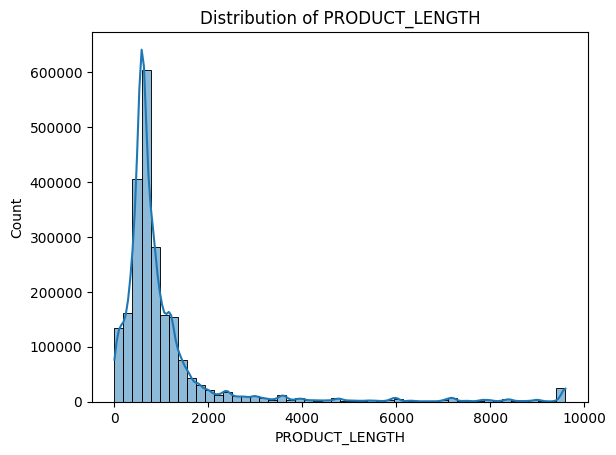

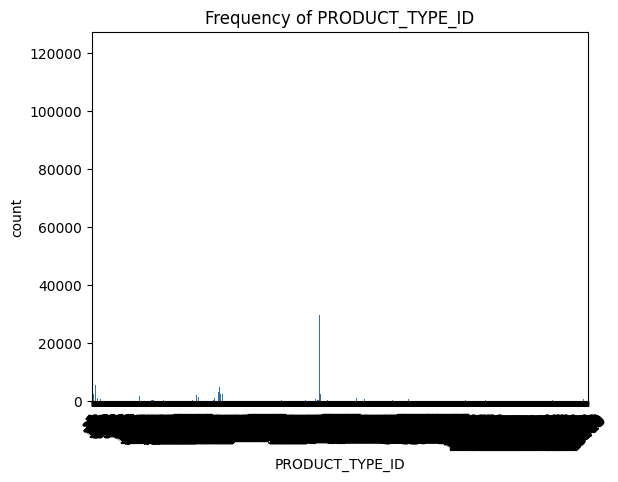

In [7]:
#데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# PRODUCT_LENGTH 히스토그램
sns.histplot(df['PRODUCT_LENGTH'], bins=50, kde=True)
plt.title("Distribution of PRODUCT_LENGTH")
plt.show()

